<figure>
<img src="../Imagenes/logo-final-ap.png"  width="80" height="80" align="left"/> 
</figure>

# <span style="color:#4361EE"><left>Aprendizaje Profundo</left></span>

# <span style="color:red"><center>Diplomado en Inteligencia Artificial y Aprendizaje Profundo</center></span>

# <span style="color:green"><center>Canalización  de datos. La API tf.data</center></span>

<figure>
<center>
<img src="../Imagenes/garden_tensorflow.jpg" width=700 height= 400  />      
<center>
</figure>

## <span style="color:#4361EE">Profesores</span>

1. Alvaro  Montenegro, PhD, ammontenegrod@unal.edu.co
1. Camilo José Torres Jiménez, Msc, cjtorresj@unal.edu.co
1. Daniel  Montenegro, Msc, dextronomo@gmail.com 

## <span style="color:#4361EE">Coautor</span>

Oleg Jarma, ojarmam@unal.edu.co 

## <span style="color:#4361EE">Asesora Medios y Marketing digital</span>

4. Maria del Pilar Montenegro, pmontenegro88@gmail.com
5. Jessica López Mejía, jelopezme@unal.edu.co
6. Venus Puertas, vpuertasg@unal.edu.co

## <span style="color:#4361EE">Jefe Jurídica</span>

7. Paula Andrea Guzmán, guzmancruz.paula@gmail.com

## <span style="color:#4361EE">Coordinador Jurídico</span>

8. David Fuentes, fuentesd065@gmail.com

## <span style="color:#4361EE">Desarrolladores Principales</span>

9. Dairo Moreno, damoralesj@unal.edu.co
10. Joan Castro, jocastroc@unal.edu.co
11. Bryan Riveros, briveros@unal.edu.co
12. Rosmer Vargas, rovargasc@unal.edu.co

## <span style="color:#4361EE">Expertos en Bases de Datos</span>

13. Giovvani Barrera, udgiovanni@gmail.com
14. Camilo Chitivo, cchitivo@unal.edu.co

## <span style="color:#4361EE">Introducción</span> 

Basado en [tf.data](https://www.tensorflow.org/guide/data).

La API `tf.data` permite crear tuberías de entrada complejas a partir de piezas simples y reutilizables. Por ejemplo, la canalización de un modelo de imagen podría agregar datos de archivos en un sistema de archivos distribuido, aplicar perturbaciones aleatorias a cada imagen y fusionar imágenes seleccionadas al azar en un lote para entrenamiento. La canalización de un modelo de texto puede implicar extraer símbolos de datos de texto sin procesar, convertirlos en identificadores incrustados con una tabla de búsqueda y agrupar secuencias de diferentes longitudes. 

## <span style="color:#4361EE">Importa librerías</span> 

In [1]:
import tensorflow as tf

import pathlib
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

np.set_printoptions(precision=4)

2021-10-27 11:14:36.168920: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


## <span style="color:#4361EE">Esenciales</span> 

Para crear una canalización de entrada, debe comenzar con una fuente de datos. Por ejemplo, para construir un `Dataset` de datos a partir de datos en la memoria, puede usar *tf.data.Dataset.from_tensors()* o *tf.data.Dataset.from_tensor_slices()*. Alternativamente, si sus datos de entrada están almacenados en un archivo en el formato *TFRecord* de TensorFlow puede usar *tf.data.TFRecordDataset()*.

El objeto Dataset es un iterable de Python. Esto hace posible consumir sus elementos usando un bucle for:

In [2]:
dataset = tf.data.Dataset.from_tensor_slices([8, 3, 0, 8, 2, 1])
dataset

2021-10-27 11:14:38.879085: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-10-27 11:14:38.879804: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-10-27 11:14:39.128895: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-27 11:14:39.129290: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 2060 computeCapability: 7.5
coreClock: 1.2GHz coreCount: 30 deviceMemorySize: 5.79GiB deviceMemoryBandwidth: 312.97GiB/s
2021-10-27 11:14:39.129308: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2021-10-27 11:14:39.198627: I tensorflow/stream_executor/platform/defa

<TensorSliceDataset shapes: (), types: tf.int32>

In [3]:
len(dataset)

6

In [4]:
for elem in dataset:
    print(elem.numpy())

8
3
0
8
2
1


o se pueden crear explícitamente un iterador

In [5]:
it = iter(dataset)
print(next(it).numpy())
print(next(it).numpy())

8
3


### <span style="color:#4CC9F0">Consumo de datos usando reducción: reduce</span>

In [6]:
print(dataset.reduce(0, lambda state, value: state+value).numpy())

22


2021-10-27 11:14:40.877414: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-10-27 11:14:40.880427: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2601325000 Hz


## <span style="color:#4361EE">Estructura del conjunto de datos</span> 

Un conjunto de datos produce una secuencia de elementos , donde cada elemento tiene la misma estructura (anidada) de componentes . 

Los componentes individuales de la estructura pueden ser de cualquier tipo representable por *tf.TypeSpec*, incluidos *tf.Tensor* , *tf.sparse.SparseTensor* ,*tf.RaggedTensor* , *tf.TensorArray* o *tf.data.Dataset*.

Las construcciones de Python que se pueden usar para expresar la estructura (anidada) de elementos incluyen *tuple , dict , NamedTuple y OrderedDict*. 

En particular, *list* no es una construcción válida para expresar la estructura de los elementos del conjunto de datos. 

Si desea que una entrada de *list* se trate como una estructura, debe convertirla en tuple y si desea que una lista de salida, entonces debe empaquetarla explícitamente usando *tf.stack*.


La propiedad *Dataset.element_spec* permite inspeccionar el tipo de cada componente del elemento. La propiedad devuelve una estructura anidada de objetos *tf.TypeSpec*, que coincide con la estructura del elemento, que puede ser un solo componente, una tupla de componentes o una tupla anidada de componentes. Por ejemplo:

In [7]:
dataset1 = tf.data.Dataset.from_tensor_slices(tf.random.uniform([4, 10]))
print(dataset1)

<TensorSliceDataset shapes: (10,), types: tf.float32>


In [8]:
for i in dataset1:
    print(i.numpy())

[0.6143 0.1727 0.6508 0.4864 0.3716 0.9486 0.5665 0.5594 0.0576 0.9023]
[1.1729e-02 9.0851e-01 3.3666e-01 6.3419e-04 2.4943e-01 4.6697e-02
 9.7493e-01 5.1887e-01 6.0174e-01 7.2745e-01]
[0.4474 0.0227 0.0012 0.5103 0.099  0.1649 0.9021 0.2701 0.4714 0.7356]
[0.4228 0.2625 0.7598 0.8483 0.6128 0.3952 0.6487 0.3378 0.3738 0.09  ]


In [9]:
len(dataset1)

4

In [10]:
dataset2 = tf.data.Dataset.from_tensor_slices(
    (tf.random.uniform([4]), #y
     tf.random.uniform([4,100], maxval=100, dtype=tf.int32))) #x

dataset2.element_spec
    

(TensorSpec(shape=(), dtype=tf.float32, name=None),
 TensorSpec(shape=(100,), dtype=tf.int32, name=None))

In [11]:
len(dataset2)

4

In [12]:
dataset3 = tf.data.Dataset.zip((dataset1, dataset2))
dataset3.element_spec

(TensorSpec(shape=(10,), dtype=tf.float32, name=None),
 (TensorSpec(shape=(), dtype=tf.float32, name=None),
  TensorSpec(shape=(100,), dtype=tf.int32, name=None)))

In [13]:
len(dataset3)

4

In [14]:
type(dataset3)

tensorflow.python.data.ops.dataset_ops.ZipDataset

In [15]:
i = iter(dataset3)

In [16]:
print(i.next(), "\n")
print(i.next(), "\n")
print(i.next(), "\n")
print(i.next(), "\n")

(<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([0.6143, 0.1727, 0.6508, 0.4864, 0.3716, 0.9486, 0.5665, 0.5594,
       0.0576, 0.9023], dtype=float32)>, (<tf.Tensor: shape=(), dtype=float32, numpy=0.89718556>, <tf.Tensor: shape=(100,), dtype=int32, numpy=
array([59, 45, 62, 51, 24, 76, 83, 94, 97, 89, 21, 60, 86, 43, 55, 94, 30,
        1, 59, 35, 67, 99, 61, 63, 30,  0, 65, 89, 81, 35, 10, 67, 15, 20,
       85,  0, 59, 77, 47, 19, 15, 58, 47, 21, 94, 58,  2, 48, 37, 71, 19,
       35, 76,  7, 11, 23, 80, 11, 40, 23, 73, 59, 24, 56,  1, 70, 51, 46,
       87, 98, 20, 30,  4, 55, 18, 20, 43, 56, 43, 98,  3, 54, 82, 31,  6,
       77, 67, 88, 70, 48, 76, 88, 66, 20,  6,  1, 43, 46, 72, 27],
      dtype=int32)>)) 

(<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([1.1729e-02, 9.0851e-01, 3.3666e-01, 6.3419e-04, 2.4943e-01,
       4.6697e-02, 9.7493e-01, 5.1887e-01, 6.0174e-01, 7.2745e-01],
      dtype=float32)>, (<tf.Tensor: shape=(), dtype=float32, numpy=0.2631073>, <tf.Tens

In [17]:
for a, (b,c) in dataset3:
    print('shapes: {a.shape}, {b.shape}, {c.shape}'.format(a=a, b=b, c=c))

shapes: (10,), (), (100,)
shapes: (10,), (), (100,)
shapes: (10,), (), (100,)
shapes: (10,), (), (100,)


In [18]:
# dataset con tensores dispersos
dataset4 = tf.data.Dataset.from_tensors(tf.SparseTensor(indices=[[0, 0],[1, 2]], values=[1, 2], dense_shape=[3, 4]))
dataset4.element_spec

SparseTensorSpec(TensorShape([3, 4]), tf.int32)

In [19]:
dataset4.element_spec.value_type

tensorflow.python.framework.sparse_tensor.SparseTensor

## <span style="color:#4361EE">Leer datos de entrada</span> 

### <span style="color:#4CC9F0">Consumir matrices Numpy</span>

Si todos sus datos de entrada caben en la memoria, la forma más sencilla de crear un Dataset a partir de ellos es convertirlos en objetos tf.Tensor y usar Dataset.from_tensor_slices() .

In [20]:
train, test = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [21]:
imagenes, labels  = train
imagenes = imagenes /255.

dataset = tf.data.Dataset.from_tensor_slices((imagenes, labels))
dataset

2021-10-27 11:14:46.698987: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 376320000 exceeds 10% of free system memory.


<TensorSliceDataset shapes: ((28, 28), ()), types: (tf.float64, tf.uint8)>

### <span style="color:#4CC9F0">Consumir generadores de Python</span>

In [22]:
def count(stop):
    i=0
    while i<stop:
        yield i
        i+= 1
        
for n in count(5):
    print(n)

0
1
2
3
4


El constructor `Dataset.from_generator` convierte el generador de Python en un `tf.data.Dataset` completamente funcional.

El constructor toma un invocable como entrada, no un iterador. Esto le permite reiniciar el generador cuando llega al final. Toma un argumento args opcional, que se pasa como argumentos del invocable.

El argumento *output_types* es necesario porque *tf.data* crea un *tf.Graph* internamente y los bordes del gráfico requieren un tf.dtype .




In [23]:
ds_counter = tf.data.Dataset.from_generator(count, args=[25], output_types=tf.int32, output_shapes=(),)

In [24]:
for count_batch in ds_counter.repeat().batch(10).take(10):
    print(count_batch.numpy())

[0 1 2 3 4 5 6 7 8 9]
[10 11 12 13 14 15 16 17 18 19]
[20 21 22 23 24  0  1  2  3  4]
[ 5  6  7  8  9 10 11 12 13 14]
[15 16 17 18 19 20 21 22 23 24]
[0 1 2 3 4 5 6 7 8 9]
[10 11 12 13 14 15 16 17 18 19]
[20 21 22 23 24  0  1  2  3  4]
[ 5  6  7  8  9 10 11 12 13 14]
[15 16 17 18 19 20 21 22 23 24]


El argumento `output_shapes` no es necesario, pero se recomienda, ya que muchas operaciones de flujo tensorial no admiten tensores con rango desconocido. Si la longitud de un eje en particular es desconocida o variable, output_shapes puede colocarse como None.

También es importante tener en cuenta que `output_shapes` y `output_types` siguen las mismas reglas de anidamiento que otros métodos de conjuntos de datos.

Aquí hay un generador de ejemplo que demuestra ambos aspectos, devuelve tuplas de matrices, donde la segunda matriz es un vector con longitud desconocida.

In [25]:
def gen_series():
    i = 0
    while True:
        size = np.random.randint(0,10)
        yield i, np.random.normal(size = (size,))
        i+=1

In [26]:
for i, series in gen_series():
    print(i, ":", str(series))
    if i > 5:
        break

0 : [-0.2311]
1 : [-0.9686 -0.6723  0.6278 -0.761  -0.1297 -0.6381]
2 : []
3 : []
4 : [-0.134]
5 : [-0.8309  0.4063  0.5506 -0.3408]
6 : [-1.3336  1.3925  0.1096 -1.1965 -0.2353  1.4199  0.9267 -0.6835]


La primera salida es un *int32* la segunda es un *float32*.

El primer elemento es un escalar, forma () , y el segundo es un vector de longitud desconocida, forma (None,)


In [27]:
ds_series = tf.data.Dataset.from_generator(
    gen_series,
    output_types=(tf.int32, tf.float32),
    output_shapes=((), (None, )))

ds_series

<FlatMapDataset shapes: ((), (None,)), types: (tf.int32, tf.float32)>

Ahora se puede utilizar como un *tf.data.Dataset* normal. Tenga en cuenta que al procesar por lotes un conjunto de datos con una forma variable, debe usar *Dataset.padded_batch*.

In [28]:
ds_series_batch = ds_series.shuffle(20).padded_batch(10)

ids, sequence_batch = next(iter(ds_series_batch))

print (ids.numpy())
print()
print(sequence_batch.numpy())

[ 1 14 17  7 21 20 19 24 26 23]

[[ 0.872   0.      0.      0.      0.      0.      0.      0.      0.    ]
 [ 0.      0.      0.      0.      0.      0.      0.      0.      0.    ]
 [ 0.      0.      0.      0.      0.      0.      0.      0.      0.    ]
 [ 0.      0.      0.      0.      0.      0.      0.      0.      0.    ]
 [ 0.5344 -0.8575  0.      0.      0.      0.      0.      0.      0.    ]
 [ 1.424   0.0269 -1.2718  0.      0.      0.      0.      0.      0.    ]
 [ 0.0719 -0.701  -1.1496 -0.6294  0.      0.      0.      0.      0.    ]
 [ 0.4681  0.4923 -1.4863  0.1351 -0.5685  0.4341 -0.5812  0.      0.    ]
 [-0.0529  1.4876  0.8683  0.4717 -1.1321  1.6762  0.0838 -1.0582 -0.4435]
 [ 0.0471 -2.5569  0.3248 -1.5189  0.      0.      0.      0.      0.    ]]


In [29]:
it = iter(ds_series_batch)
for i in range(10):
    ids, sequence_batch = next(it)
    print (ids.numpy())
    print()
    print(sequence_batch.numpy())
    print()
    

[ 7 16 12  5 11 15  6 13  2 18]

[[-1.4672 -0.1405  0.      0.      0.      0.      0.      0.    ]
 [-0.6291 -0.648   1.1858 -0.0339  1.0398  0.5672  1.1503 -0.9136]
 [ 0.1728  0.      0.      0.      0.      0.      0.      0.    ]
 [-0.107  -0.8513  0.      0.      0.      0.      0.      0.    ]
 [ 0.9371  0.8138  0.5843  0.2523 -1.4394  1.4096  0.      0.    ]
 [ 0.4807  0.7075 -0.0508 -0.2766  1.1682  0.      0.      0.    ]
 [-0.1746  1.3332 -0.168  -0.2606  0.2766  0.      0.      0.    ]
 [ 0.2357  1.0988 -1.2427  0.9682  0.      0.      0.      0.    ]
 [-0.3176 -0.4375 -1.1106  0.      0.      0.      0.      0.    ]
 [-0.9847 -0.0585  1.9546  0.44   -0.0685 -1.7938  0.      0.    ]]

[25 23  8 20 21 22 19 10  0 26]

[[-0.6809 -0.0455  0.1088 -0.8211  1.2413 -1.5584  0.      0.      0.    ]
 [-0.4125 -1.905  -1.2539  0.0093  1.3305  0.1917  0.1565 -0.7806  0.3128]
 [-2.05   -2.2507 -0.2782  0.      0.      0.      0.      0.      0.    ]
 [ 0.      0.      0.      0.      0.

### <span style="color:#4CC9F0">Ejemplo realista con imágenes</span>

Para obtener un ejemplo más realista, intente `tf.data.Dataset` `preprocessing.image.ImageDataGenerator` como un `tf.data.Dataset` .

Primero descargue los datos:


In [30]:
flowers = tf.keras.utils.get_file(
    'flower_photos',
    'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
    cache_dir='/media/storage', #dirección de extracción
    cache_subdir='Datasets', #carpeta que se crea para la extracción
    untar=True)

228818944/228813984 [==============================] - 24s 0us/step


In [31]:
print(flowers)

/tmp/.keras/Datasets/flower_photos


Cree la `image.ImageDataGenerator`

In [32]:
image_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, rotation_range=20)

In [33]:
images, labels = next(image_gen.flow_from_directory(flowers))

Found 3670 images belonging to 5 classes.


In [34]:
print(images.dtype, images.shape)
print(labels.dtype, labels.shape)

float32 (32, 256, 256, 3)
float32 (32, 5)


In [35]:
ds = tf.data.Dataset.from_generator(
    lambda: image_gen.flow_from_directory(flowers),
    output_types=(tf.float32, tf.float32),
    output_shapes=([32,256,256,3],[32,5]))

ds.element_spec

(TensorSpec(shape=(32, 256, 256, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(32, 5), dtype=tf.float32, name=None))

### <span style="color:#4CC9F0">Consumir datos de texto</span>

Muchos conjuntos de datos se distribuyen como uno o más archivos de texto. `tf.data.TextLineDataset` proporciona una manera fácil de extraer líneas de uno o más archivos de texto. 

Dados uno o más nombres de archivo, un `TextLineDataset` producirá un elemento con valor de cadena por línea de esos archivos.

In [36]:
directory_url = 'https://storage.googleapis.com/download.tensorflow.org/data/illiad/'
file_names = ['cowper.txt', 'derby.txt', 'butler.txt']

file_paths = [
    tf.keras.utils.get_file(file_name, directory_url +file_name)
    for file_name in file_names
]

811008/807992 [==============================] - 0s 0us/step


In [37]:
file_paths

['/home/thejarmanitor/.keras/datasets/cowper.txt',
 '/home/thejarmanitor/.keras/datasets/derby.txt',
 '/home/thejarmanitor/.keras/datasets/butler.txt']

In [38]:
dataset = tf.data.TextLineDataset(file_paths)

Estas son las primeras líneas del primer archivo:

In [39]:
for line in dataset.take(5):
    print(line.numpy())

b"\xef\xbb\xbfAchilles sing, O Goddess! Peleus' son;"
b'His wrath pernicious, who ten thousand woes'
b"Caused to Achaia's host, sent many a soul"
b'Illustrious into Ades premature,'
b'And Heroes gave (so stood the will of Jove)'


Para alternar líneas entre archivos, use `Dataset.interleave` . Esto facilita la reproducción aleatoria de archivos. Aquí están la primera, segunda y tercera líneas de cada traducción:

In [40]:
file_ds = tf.data.Dataset.from_tensor_slices(file_paths)

In [41]:
for i in file_ds: print(i.numpy())

b'/home/thejarmanitor/.keras/datasets/cowper.txt'
b'/home/thejarmanitor/.keras/datasets/derby.txt'
b'/home/thejarmanitor/.keras/datasets/butler.txt'


In [42]:
line_ds = file_ds.interleave(tf.data.TextLineDataset, cycle_length=3)

for i, line in enumerate(line_ds.take(9)):
    if i%3 ==0:
        print()
    print(line.numpy())


b"\xef\xbb\xbfAchilles sing, O Goddess! Peleus' son;"
b"\xef\xbb\xbfOf Peleus' son, Achilles, sing, O Muse,"
b'\xef\xbb\xbfSing, O goddess, the anger of Achilles son of Peleus, that brought'

b'His wrath pernicious, who ten thousand woes'
b'The vengeance, deep and deadly; whence to Greece'
b'countless ills upon the Achaeans. Many a brave soul did it send'

b"Caused to Achaia's host, sent many a soul"
b'Unnumbered ills arose; which many a soul'
b'hurrying down to Hades, and many a hero did it yield a prey to dogs and'


De manera predeterminada, `TextLineDataset` produce todas las lineas de cada archivo, lo cual tal vez no sea lo que se quiera. Tal vez el archivo empieza con el encabezado, o contiene comentarios. Para remover o pasarse estas lineas se usan las transformaciones `Dataset.skip()` o `Dataset.filter()`


A continuación, trabajamos con el archivo de la tragedia del Titanic. Se salta la primera linea, y filtramos para tener solo a los sobrevivientes

In [43]:
titanic_file = tf.keras.utils.get_file("train.csv", "https://storage.googleapis.com/tf-datasets/titanic/train.csv")
titanic_lines = tf.data.TextLineDataset(titanic_file)

32768/30874 [===============================] - 0s 1us/step


In [44]:
for line in titanic_lines.take(10):
    print(line.numpy())

b'survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone'
b'0,male,22.0,1,0,7.25,Third,unknown,Southampton,n'
b'1,female,38.0,1,0,71.2833,First,C,Cherbourg,n'
b'1,female,26.0,0,0,7.925,Third,unknown,Southampton,y'
b'1,female,35.0,1,0,53.1,First,C,Southampton,n'
b'0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y'
b'0,male,2.0,3,1,21.075,Third,unknown,Southampton,n'
b'1,female,27.0,0,2,11.1333,Third,unknown,Southampton,n'
b'1,female,14.0,1,0,30.0708,Second,unknown,Cherbourg,n'
b'1,female,4.0,1,1,16.7,Third,G,Southampton,n'


In [45]:
def survived(line):
    return tf.not_equal(tf.strings.substr(line,0,1), '0')

survivors=titanic_lines.skip(1).filter(survived)

In [46]:
for line in survivors.take(10):
    print(line.numpy())

b'1,female,38.0,1,0,71.2833,First,C,Cherbourg,n'
b'1,female,26.0,0,0,7.925,Third,unknown,Southampton,y'
b'1,female,35.0,1,0,53.1,First,C,Southampton,n'
b'1,female,27.0,0,2,11.1333,Third,unknown,Southampton,n'
b'1,female,14.0,1,0,30.0708,Second,unknown,Cherbourg,n'
b'1,female,4.0,1,1,16.7,Third,G,Southampton,n'
b'1,male,28.0,0,0,13.0,Second,unknown,Southampton,y'
b'1,female,28.0,0,0,7.225,Third,unknown,Cherbourg,y'
b'1,male,28.0,0,0,35.5,First,A,Southampton,y'
b'1,female,38.0,1,5,31.3875,Third,unknown,Southampton,n'


### <span style="color:#4CC9F0">Consumir Datos CSV</span>

El formato CSV es muy popular para guardar datos tabulares en forma de texto.

Ya subimos el archivo del titanic, el cual es csv. Podemos subirlo en este mismo formato usando pandas 

In [47]:
df=pd.read_csv(titanic_file)
df.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


Si se tiene suficiente memoria, pueden transformar a diccionario el Dataframe e importar los datos con facilidad

In [48]:
titanic_slices = tf.data.Dataset.from_tensor_slices(dict(df))

for feature_batch in titanic_slices.take(1):
  for key, value in feature_batch.items():
    print("  {!r:20s}: {}".format(key, value))

  'survived'          : 0
  'sex'               : b'male'
  'age'               : 22.0
  'n_siblings_spouses': 1
  'parch'             : 0
  'fare'              : 7.25
  'class'             : b'Third'
  'deck'              : b'unknown'
  'embark_town'       : b'Southampton'
  'alone'             : b'n'


Un acercamiento más ameno es cargar desde el disco cuando sea necesario.

el módulo tiene métodos para extraer rgistros de uno o más archivos CSV que cumplan con la [RFC 4180](https://tools.ietf.org/html/rfc4180)

la función `experimental.make_csv_dataset` es una interfaz para leer conjuntos de archivos CSV, con lo cual podemos hacer inferencia por columna y crear lotes de los datos

Se puede usar el argumento `select_columns` si solo se necesitan algunas columnas

In [ ]:
titanic_batches = tf.data.experimental.make_csv_dataset(
    titanic_file, batch_size=4,
    label_name="survived", select_columns=['class', 'fare', 'survived'])

In [ ]:
for feature_batch, label_batch in titanic_batches.take(1):
  print("'survived': {}".format(label_batch))
  for key, value in feature_batch.items():
    print("  {!r:20s}: {}".format(key, value))

### <span style="color:#4CC9F0">Consumir conjuntos de archivos</span>

Es normal que los datos estén distribuidos en múltiples archivos, con cada archivo teniendo ejemplos

In [ ]:
flowers_root = tf.keras.utils.get_file(
    'flower_photos',
    'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
    untar=True)
flowers_root = pathlib.Path(flowers_root)

Cada directorio de la carpeta raíz contiene un directorio de cada clase

In [52]:
for item in flowers_root.glob("*"):
  print(item.name)

daisy
tulips
roses
sunflowers
dandelion
LICENSE.txt


Cada archivo en los directorios son ejemplos

In [53]:
list_ds = tf.data.Dataset.list_files(str(flowers_root/'*/*'))

for f in list_ds.take(5):
  print(f.numpy())

b'/home/thejarmanitor/.keras/datasets/flower_photos/dandelion/14313509432_6f2343d6c8_m.jpg'
b'/home/thejarmanitor/.keras/datasets/flower_photos/tulips/8603340662_0779bd87fd.jpg'
b'/home/thejarmanitor/.keras/datasets/flower_photos/dandelion/19613308325_a67792d889.jpg'
b'/home/thejarmanitor/.keras/datasets/flower_photos/dandelion/3496258301_ca5f168306.jpg'
b'/home/thejarmanitor/.keras/datasets/flower_photos/dandelion/8979087213_28f572174c.jpg'


Usando `tf.io.read_file` podemos leer los datos y extraer las etiquetas, obteniendo (imagen, etiqueta)

In [54]:
def process_path(file_path):
  label = tf.strings.split(file_path, os.sep)[-2]
  return tf.io.read_file(file_path), label

labeled_ds = list_ds.map(process_path)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [55]:
for image_raw, label_text in labeled_ds.take(1):
  print(repr(image_raw.numpy()[:100]))
  print()
  print(label_text.numpy())

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xed\x00\xf8Photoshop 3.0\x008BIM\x04\x04\x00\x00\x00\x00\x00\xae\x1c\x01\x00\x00\x02\x00\x04\x1c\x02\x00\x00\x02\x00\x04\x1c\x02\x19\x00\x04blur\x1c\x02\x19\x00\x05bokeh\x1c\x02\x19\x00\nCalifornia\x1c\x02'

b'roses'


## <span style="color:#4361EE">Loteo de elementos del dataset</span>

### <span style="color:#4CC9F0">Loteo simple</span>

La transformación `Dataset.batch()` es la forma más sencilla de hacer un lote de `n` elementos consecutivos. Para cada componente, todos los elementos deben tener un tensor de exactamente la misma dimensión

In [56]:
inc_dataset = tf.data.Dataset.range(100)
dec_dataset = tf.data.Dataset.range(0, -100, -1)
dataset = tf.data.Dataset.zip((inc_dataset, dec_dataset))
batched_dataset = dataset.batch(4)

for batch in batched_dataset.take(4):
  print([arr.numpy() for arr in batch])

[array([0, 1, 2, 3]), array([ 0, -1, -2, -3])]
[array([4, 5, 6, 7]), array([-4, -5, -6, -7])]
[array([ 8,  9, 10, 11]), array([ -8,  -9, -10, -11])]
[array([12, 13, 14, 15]), array([-12, -13, -14, -15])]


### <span style="color:#4CC9F0">Loteo de tensores con acolchamiento</span>

Con el loteo simple todos los tensores deben tener la misma dimensión, pero esto no va a ser el caso todas las veces. Utilizando `Dataset.padded_batch` se hace un acolchamiento de los tensores de distintas formas, específicando las dimensiones a las cuales hay que aplicar acolchamiento

In [57]:
dataset = tf.data.Dataset.range(100)
dataset = dataset.map(lambda x: tf.fill([tf.cast(x, tf.int32)], x))
dataset = dataset.padded_batch(4, padded_shapes=(None,))

for batch in dataset.take(2):
  print(batch.numpy())
  print()

[[0 0 0]
 [1 0 0]
 [2 2 0]
 [3 3 3]]

[[4 4 4 4 0 0 0]
 [5 5 5 5 5 0 0]
 [6 6 6 6 6 6 0]
 [7 7 7 7 7 7 7]]



## <span style="color:#4361EE">Flujo de entrenamiento</span>

### <span style="color:#4CC9F0">Procesando múltiples epochs</span>

La API ofrece dos maneras de procesar múltiples epochs de los mismos datos.

La primera manera es iterando sobre el el conjunto de datos utilizando `Dataset.repeat()`. volvemos al ejemplo de texto del Titanic. 

In [58]:
def plot_batch_sizes(ds):
  batch_sizes = [batch.shape[0] for batch in ds]
  plt.bar(range(len(batch_sizes)), batch_sizes)
  plt.xlabel('Batch number')
  plt.ylabel('Batch size')

`Dataset.repeat` hace una concatenación de los argumentos sin señalar el inicio o el final de un epoch. Si aplicamos
`Dataset.batch` Después de esta, se producirán lotes que van más allá de los límites e los epochs.

Si la función `repeat` no tiene argumentos, se hará una repetición infinita.

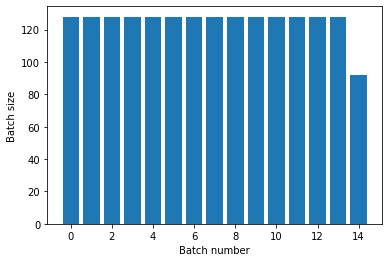

In [59]:
titanic_batches = titanic_lines.repeat(3).batch(128)
plot_batch_sizes(titanic_batches)

Si queremos una separación clara de los epoch, se aplica `Dataset.batch` antes de `repeat`

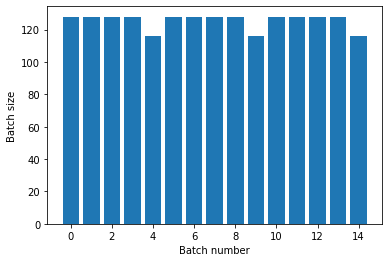

In [60]:
titanic_batches = titanic_lines.batch(128).repeat(3)

plot_batch_sizes(titanic_batches)

Si queremos, por ejemplo, recopilar estadísticas al final de cada epoch, podemos hacer una iteración y reiniciar después de cada epoch

In [61]:
epochs = 3
dataset = titanic_lines.batch(128)

for epoch in range(epochs):
  for batch in dataset:
    print(batch.shape)
  print("End of epoch: ", epoch)

(128,)
(128,)
(128,)
(128,)
(116,)
End of epoch:  0
(128,)
(128,)
(128,)
(128,)
(116,)
End of epoch:  1
(128,)
(128,)
(128,)
(128,)
(116,)
End of epoch:  2


## <span style="color:#4361EE">Mezclar los datos de entrada</span>

La transformación `Dataser.shuffle()` toma una muestra de un tamaño predeterminado y selecciona el siguiente dato del buffer.
Le agregaremos un indice a los datos del titanic para que el efecto sea visible

In [62]:
lines = tf.data.TextLineDataset(titanic_file)
counter = tf.data.experimental.Counter()

dataset = tf.data.Dataset.zip((counter, lines))
dataset = dataset.shuffle(buffer_size=100)
dataset = dataset.batch(20)
dataset

<BatchDataset shapes: ((None,), (None,)), types: (tf.int64, tf.string)>

In [63]:
n,line_batch = next(iter(dataset))
print(n.numpy())

[ 60  71  23  11 103  25  46  18  48  45 107  17  56  80   5  43  76 106
  39  47]


`shuffle` no señala el fin de un epoch hasta que el buffer esté vacío. Si aplicamos `repeat` antes de este, se podrá ver el momento en el que termina un epoch y empieza otro

In [64]:
dataset = tf.data.Dataset.zip((counter, lines))
shuffled = dataset.shuffle(buffer_size=100).batch(10).repeat(2)

print("esta es la lista de indices cercanos al fin del epoch:\n")
for n, line_batch in shuffled.skip(60).take(5):
  print(n.numpy())

esta es la lista de indices cercanos al fin del epoch:

[610 615 266 557 573  40 547 625 362 520]
[616 436 502 602 482 507 593 589 470 523]
[477 569 617 583 517 476 503 543]
[87 17 30 60 32 86 74 64 34 65]
[ 98  80  55   5  69 113   7  46  79 110]


gráficamente se puede apreciar mejor

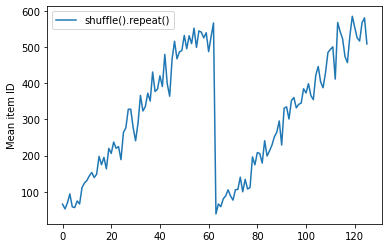

In [65]:
shuffle_repeat = [n.numpy().mean() for n, line_batch in shuffled]
plt.plot(shuffle_repeat, label="shuffle().repeat()")
plt.ylabel("Mean item ID")
plt.legend()

Si ponemos `repeat` antes de la mezcla, los límites de los epoch se mantendrán iguales hasta que no hayan más objetos que mezclar

In [66]:
dataset = tf.data.Dataset.zip((counter, lines))
shuffled = dataset.repeat(2).shuffle(buffer_size=100).batch(10)

print("esta es la lista de indices cercanos al fin del epoch:\n")
for n, line_batch in shuffled.skip(55).take(15):
  print(n.numpy())

esta es la lista de indices cercanos al fin del epoch:

[ 19  18 564 616 620  17 431 612 603 611]
[594  24  15 609 600 491 483 627 624  30]
[ 31 493 525 379 425   5  29 558  14  48]
[ 44 563  97 625 453  42 501 500 486  57]
[  8  33 524  25 610  34  28  55  50 553]
[ 60 574 551 584 598   9 530 554  54  68]
[583  46 537  40 626  13  43 587  22 308]
[ 27 516  41  62 577  88 406  92 595  35]
[ 91  69  84  51   4 602  83 107  36  20]
[ 58  21 532  16 569  81  90 567 535  49]
[562 474 120  94  76   1  66 109 613 575]
[601 129  99 113  23  87 619  85  64 508]
[138 621  78  37 108 517  39 108 239 494]
[131 133 124  72 590  59  71 134 100  96]
[126 454 136  32  98 137   7 114 592 142]


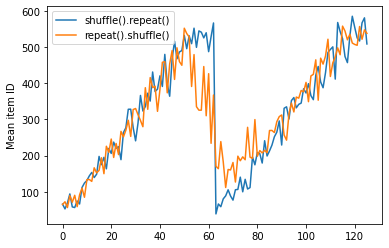

In [67]:
repeat_shuffle = [n.numpy().mean() for n, line_batch in shuffled]

plt.plot(shuffle_repeat, label="shuffle().repeat()")
plt.plot(repeat_shuffle, label="repeat().shuffle()")
plt.ylabel("Mean item ID")
plt.legend()

## <span style="color:#4361EE">Preprocesamiento de datos</span>

Si se quiere aplicar alguna función a los datos en cuestión, se utiliza  la transformación `Dataset.map(f)`. Esta toma los objetos `t f.Tensor` de un solo elemento y saca nuevos objetos en un nuevo conjunto de datos.

Aquí mostramos dos ejemplos muy comunes de pre procesamiento

### <span style="color:#4CC9F0">Decodificando imagenes y cambiar su tamaño</span>

Al trabajar con imágenes de la vida cotidiana, lo más probable es que necesitemos estandarizar los tamaños a uno en común. 

Utilizaremos la lista de flores para este ejemplo

In [68]:
list_ds = tf.data.Dataset.list_files(str(flowers_root/'*/*'))

Escribimos una función para manipular datos

In [69]:
# Lee una imagen de un archivo, la decodifica en un tensor y cambia su tamaño
# a una forma predeterminada
def parse_image(filename):
  parts = tf.strings.split(filename, os.sep)
  label = parts[-2]

  image = tf.io.read_file(filename)
  image = tf.image.decode_jpeg(image)
  image = tf.image.convert_image_dtype(image, tf.float32)
  image = tf.image.resize(image, [128, 128])
  return image, label

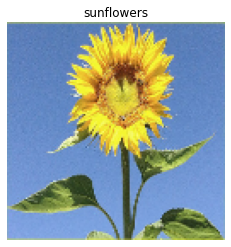

In [70]:
file_path = next(iter(list_ds))
image, label = parse_image(file_path)

def show(image, label):
  plt.figure()
  plt.imshow(image)
  plt.title(label.numpy().decode('utf-8'))
  plt.axis('off')

show(image, label)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


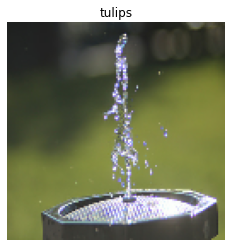

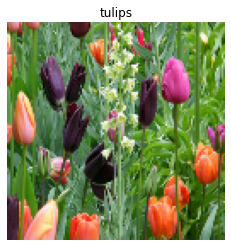

In [71]:
images_ds = list_ds.map(parse_image)

for image, label in images_ds.take(2):
  show(image, label)

### <span style="color:#4CC9F0">Aplicando funciones de python</span>

Por razones de rendimiento, es mejor usar únicamente funciones de Tensorflow para manipular datos, pero a veces es necesario usar herramientas de otros paquetes de python.

Para esto utilizamos `tf.py_function()` como función en `Dataset.map()`

Supongamos que queremos hacer una rotación aleatoria en un conjunto de imágenes. Tensorflow sólo tiene `tf.image.rot90`, lo cual no sirve para la intención que se tiene. por suerte, el paquete scipy cuenta con `scipy.ndimage.rotate`

In [72]:
import scipy.ndimage as ndimage

def random_rotate_image(image):
  image = ndimage.rotate(image, np.random.uniform(-30, 30), reshape=False)
  return image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


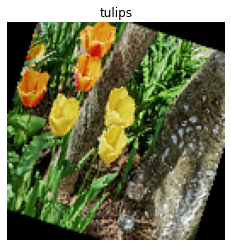

In [73]:
image, label = next(iter(images_ds))
image = random_rotate_image(image)
show(image, label)

In [74]:
def tf_random_rotate_image(image, label):
  im_shape = image.shape
  [image,] = tf.py_function(random_rotate_image, [image], [tf.float32])
  image.set_shape(im_shape)
  return image, label

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


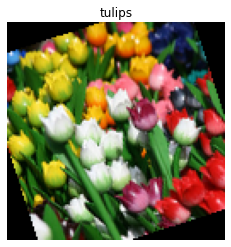

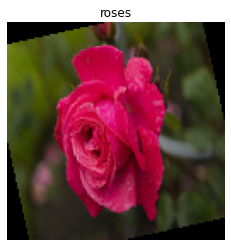

In [75]:
rot_ds = images_ds.map(tf_random_rotate_image)

for image, label in rot_ds.take(2):
  show(image, label)

## <span style="color:#4361EE">Ventaneo De series de tiempo</span>

En el caso de modelos de series de tiempo, estos datos están organizados con el axis de tiempo intacto. Muchas veces se le alimentaran secciones de tiempo adyacentes a los modelos como datos. Hay dos maneras de generar estos cortes. La primera es utilizando lotes:

In [76]:
range_ds = tf.data.Dataset.range(100000)

In [77]:
batches = range_ds.batch(10, drop_remainder=True)

for batch in batches.take(5):
  print(batch.numpy())

[0 1 2 3 4 5 6 7 8 9]
[10 11 12 13 14 15 16 17 18 19]
[20 21 22 23 24 25 26 27 28 29]
[30 31 32 33 34 35 36 37 38 39]
[40 41 42 43 44 45 46 47 48 49]


Para hacer predicciones un paso hacia el futuro, es ideal mover los datos y etiquetas un paso relativo a ellos

In [78]:
def dense_1_step(batch):
  # Se mueven las características y etiquetas un paso hacia la derecha
  return batch[:-1], batch[1:]

predict_dense_1_step = batches.map(dense_1_step)

for features, label in predict_dense_1_step.take(3):
  print(features.numpy(), " => ", label.numpy())

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
[0 1 2 3 4 5 6 7 8]  =>  [1 2 3 4 5 6 7 8 9]
[10 11 12 13 14 15 16 17 18]  =>  [11 12 13 14 15 16 17 18 19]
[20 21 22 23 24 25 26 27 28]  =>  [21 22 23 24 25 26 27 28 29]


Para predecir una ventana completa de tiempo, podemos separar los lotes en dos partes

In [79]:
batches = range_ds.batch(15, drop_remainder=True)

def label_next_5_steps(batch):
  return (batch[:-5],   # Se toman los primeros 10 pasos
          batch[-5:])   # se toma el residuo

predict_5_steps = batches.map(label_next_5_steps)

for features, label in predict_5_steps.take(3):
  print(features.numpy(), " => ", label.numpy())

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
[0 1 2 3 4 5 6 7 8 9]  =>  [10 11 12 13 14]
[15 16 17 18 19 20 21 22 23 24]  =>  [25 26 27 28 29]
[30 31 32 33 34 35 36 37 38 39]  =>  [40 41 42 43 44]


Para permitir que se superpongan las características de un lote y las etiquetas de otro, podemos usar `Dataset.zip()`

In [80]:
feature_length = 10
label_length = 3

features = range_ds.batch(feature_length, drop_remainder=True)
labels = range_ds.batch(feature_length).skip(1).map(lambda labels: labels[:label_length])

predicted_steps = tf.data.Dataset.zip((features, labels))

for features, label in predicted_steps.take(5):
  print(features.numpy(), " => ", label.numpy())

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
[0 1 2 3 4 5 6 7 8 9]  =>  [10 11 12]
[10 11 12 13 14 15 16 17 18 19]  =>  [20 21 22]
[20 21 22 23 24 25 26 27 28 29]  =>  [30 31 32]
[30 31 32 33 34 35 36 37 38 39]  =>  [40 41 42]
[40 41 42 43 44 45 46 47 48 49]  =>  [50 51 52]


Por supuesto, a veces se necesitan más control de las ventanas. Razón por la que se puede usar `Dataset.window`, pero para usarla correctamente, necesitamos algo de cuidado en los datos. Esta transformación retorna un conjunto de conjuntos de datos

In [81]:
window_size = 5

windows = range_ds.window(window_size, shift=1)
for sub_ds in windows.take(5):
  print(sub_ds)

<_VariantDataset shapes: (), types: tf.int64>
<_VariantDataset shapes: (), types: tf.int64>
<_VariantDataset shapes: (), types: tf.int64>
<_VariantDataset shapes: (), types: tf.int64>
<_VariantDataset shapes: (), types: tf.int64>


¿Pero qué pasó aquí? para ver los datos como un solo conjunto, usamos `Dataset.flat_map`. Al mismo tiempo casi siempre es necesario hacer lotes

In [82]:
for x in windows.flat_map(lambda x: x).take(30):
   print(x.numpy(), end=' ')

0 1 2 3 4 1 2 3 4 5 2 3 4 5 6 3 4 5 6 7 4 5 6 7 8 5 6 7 8 9 

In [83]:
def sub_to_batch(sub):
  return sub.batch(window_size, drop_remainder=True)

for example in windows.flat_map(sub_to_batch).take(5):
  print(example.numpy())

[0 1 2 3 4]
[1 2 3 4 5]
[2 3 4 5 6]
[3 4 5 6 7]
[4 5 6 7 8]


Haciéndolo todo junto, obtendríamos una función como esta

In [84]:
def make_window_dataset(ds, window_size=5, shift=1, stride=1):
  windows = ds.window(window_size, shift=shift, stride=stride)

  def sub_to_batch(sub):
    return sub.batch(window_size, drop_remainder=True)

  windows = windows.flat_map(sub_to_batch)
  return windows

In [85]:
ds = make_window_dataset(range_ds, window_size=10, shift = 5, stride=3)

for example in ds.take(10):
  print(example.numpy())

[ 0  3  6  9 12 15 18 21 24 27]
[ 5  8 11 14 17 20 23 26 29 32]
[10 13 16 19 22 25 28 31 34 37]
[15 18 21 24 27 30 33 36 39 42]
[20 23 26 29 32 35 38 41 44 47]
[25 28 31 34 37 40 43 46 49 52]
[30 33 36 39 42 45 48 51 54 57]
[35 38 41 44 47 50 53 56 59 62]
[40 43 46 49 52 55 58 61 64 67]
[45 48 51 54 57 60 63 66 69 72]


Es sencillo extraer etiquetas con estos datos

In [86]:
dense_labels_ds = ds.map(dense_1_step)

for inputs,labels in dense_labels_ds.take(3):
  print(inputs.numpy(), "=>", labels.numpy())

[ 0  3  6  9 12 15 18 21 24] => [ 3  6  9 12 15 18 21 24 27]
[ 5  8 11 14 17 20 23 26 29] => [ 8 11 14 17 20 23 26 29 32]
[10 13 16 19 22 25 28 31 34] => [13 16 19 22 25 28 31 34 37]


## <span style="color:#4361EE">Remuestreo</span>

Es usual encontrarse con datasets desbalanceados a nivel de clases. Es buena idea aquí el hacer un remuestreo del dataset. `tf.data` da dos métodos para esto

Se usará el dataset de fraude de tarjetas de crédito es perfecto para demostrarlo

In [87]:
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/download.tensorflow.org/data/creditcard.zip',
    fname='creditcard.zip',
    cache_dir='/media/storage',
    cache_subdir='Datasets',
    extract=True)

csv_path = zip_path.replace('.zip', '.csv')

69156864/69155632 [==============================] - 7s 0us/step


In [88]:
creditcard_ds = tf.data.experimental.make_csv_dataset(
    csv_path, batch_size=1024, label_name="Class",
    # Set the column types: 30 floats and an int.
    column_defaults=[float()]*30+[int()])

Se revisará ahora la distribución de las clases a clasificar, para ver qué tan sesgados están

In [89]:
def count(counts, batch):
  features, labels = batch
  class_1 = labels == 1
  class_1 = tf.cast(class_1, tf.int32)

  class_0 = labels == 0
  class_0 = tf.cast(class_0, tf.int32)

  counts['class_0'] += tf.reduce_sum(class_0)
  counts['class_1'] += tf.reduce_sum(class_1)

  return counts

In [90]:
counts = creditcard_ds.take(10).reduce(
    initial_state={'class_0': 0, 'class_1': 0},
    reduce_func = count)

counts = np.array([counts['class_0'].numpy(),
                   counts['class_1'].numpy()]).astype(np.float32)

fractions = counts/counts.sum()
print(fractions)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
[0.9958 0.0042]


Para poder trabajar con datos desbalanceados, la mejor idea es balancearlos. Aquí algunos métodos para esto

### <span style="color:#4CC9F0">Muestreo de Datasets</span>

La forma más sencilla es usar `sample_from_datasets`. Esto es particularmente mejor cuando se tienen datasets separados por clase. Para este caso se va a filtrar los datos de fraude para esta razón

In [91]:
negative_ds = (
  creditcard_ds
    .unbatch()
    .filter(lambda features, label: label==0)
    .repeat())
positive_ds = (
  creditcard_ds
    .unbatch()
    .filter(lambda features, label: label==1)
    .repeat())

In [92]:
for features, label in positive_ds.batch(10).take(1):
  print(label.numpy())

[1 1 1 1 1 1 1 1 1 1]


Se pasarán los datasets, junto con los pesos que se quieren por `tf.data.experimental.sample_from_datasets`

In [93]:
balanced_ds = tf.data.experimental.sample_from_datasets(
    [negative_ds, positive_ds], [0.5, 0.5]).batch(10)

Ahora se generarán ejemplos de las clases con una probabilidad 50/50

In [94]:
for features, labels in balanced_ds.take(10):
  print(labels.numpy())

[1 0 0 1 0 1 1 1 1 1]
[1 0 1 1 1 0 0 1 0 1]
[1 0 0 1 0 1 1 0 1 1]
[0 1 0 1 0 0 0 0 0 1]
[1 1 0 0 0 1 0 0 0 1]
[0 0 1 0 1 0 1 1 0 1]
[0 0 1 1 1 0 0 0 0 1]
[0 1 1 0 1 1 0 0 0 1]
[0 1 0 1 0 1 0 0 0 0]
[1 0 0 1 0 0 0 0 1 1]


## <span style="color:#4361EE"> Remuestreo de rechazo</span>

Como se dijo, necesitamos que los datasets estén separados por clase. Podemos por supuesto usar `Dataset.filter`, pero eso haría que los datos se cargaran dos veces.

La función `data.experimental.rejection_resample` permite rebalancear los datos sin tener que cargarlos otra vez. Esto se logra eliminando elementos del dataset para llegar al balance.

Esta función toma un argumento `class_func`. Esta función es aplicada a cada elemento del dataset para determinar la clase que tiene.

Los elementos de `creditcard_ds` ya están separados en pares `(features,label)`. Así que la función solo tiene que retornar la etiqueta

In [95]:
def class_func(features, label):
  return label

De igual forma es necesaria una distribución objetivo y preferiblemente un estimado de esta

In [96]:
resampler = tf.data.experimental.rejection_resample(
    class_func, target_dist=[0.5, 0.5], initial_dist=fractions)

`resampler` trabaja con las observaciones de manera individual, así que hay que aplicar `unbatch()` antes.

In [97]:
resample_ds = creditcard_ds.unbatch().apply(resampler).batch(10)

Instructions for updating:
Use tf.print instead of tf.Print. Note that tf.print returns a no-output operator that directly prints the output. Outside of defuns or eager mode, this operator will not be executed unless it is directly specified in session.run or used as a control dependency for other operators. This is only a concern in graph mode. Below is an example of how to ensure tf.print executes in graph mode:



El resampler retorna pares del tipo `(class, example)` a partír de la salida de `class_func`. En este caso ya tenemos `(feature, label)`, así que se hace un map para obtener una copia extra de las etiquetas

In [98]:
balanced_ds = resample_ds.map(lambda extra_label, features_and_label: features_and_label)

In [99]:
for features, labels in balanced_ds.take(10):
  print(labels.numpy())

Proportion of examples rejected by sampler is high: [0.995800793][0.995800793 0.00419921894][0 1]
Proportion of examples rejected by sampler is high: [0.995800793][0.995800793 0.00419921894][0 1]
Proportion of examples rejected by sampler is high: [0.995800793][0.995800793 0.00419921894][0 1]
Proportion of examples rejected by sampler is high: [0.995800793][0.995800793 0.00419921894][0 1]
Proportion of examples rejected by sampler is high: [0.995800793][0.995800793 0.00419921894][0 1]
Proportion of examples rejected by sampler is high: [0.995800793][0.995800793 0.00419921894][0 1]
Proportion of examples rejected by sampler is high: [0.995800793][0.995800793 0.00419921894][0 1]
Proportion of examples rejected by sampler is high: [0.995800793][0.995800793 0.00419921894][0 1]
Proportion of examples rejected by sampler is high: [0.995800793][0.995800793 0.00419921894][0 1]
Proportion of examples rejected by sampler is high: [0.995800793][0.995800793 0.00419921894][0 1]


[1 1 1 1 0 1 0 0 1 1]
[0 1 0 1 0 0 1 1 0 0]
[0 1 1 0 1 1 0 0 0 1]
[0 1 1 0 1 1 0 1 0 1]
[0 0 1 1 1 1 1 0 0 1]
[0 1 1 0 0 1 0 0 0 0]
[0 0 0 1 1 1 1 1 1 1]
[1 1 1 1 0 1 0 0 1 1]
[0 0 1 0 1 0 0 1 0 1]
[1 0 0 0 0 1 0 0 0 1]


¿Cuál es el problema de este método? si el desbalanceo es muy grande, se va a perder una cantidad muy grande de datos. ¿Qué es más importante: La cantidad de datos o la cantidad de recursos?